In [1]:
import pandas as pd
import seaborn as sns



In [2]:
{'ApplicantIncome',"Applicant's monthly salary/income",  '5849; 4583'},
{ 'CoapplicantIncome',  "Additional applicant's monthly salary/income", '1508; 2358; ...'},
{ 'LoanAmount',  'Loan amount', '128; 66; ...'},
{ 'Loan_Amount_Term',"The loan's repayment period (in days)", '360; 120; ...'},
{'Credit_History',  'Records of previous credit history (0: bad credit history, 1: good credit history)', '0; 1'},

({'0; 1',
  'Credit_History',
  'Records of previous credit history (0: bad credit history, 1: good credit history)'},)

# clean Data

In [3]:
loanData = pd.read_csv('loanData.csv')
loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# droping Loan_ID column and Property_Area column won't affect the model and it may increase the bias
loanData.drop(['Loan_ID','Property_Area'], axis=1, inplace=True)
loanData

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


In [5]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [6]:
loanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

<Axes: >

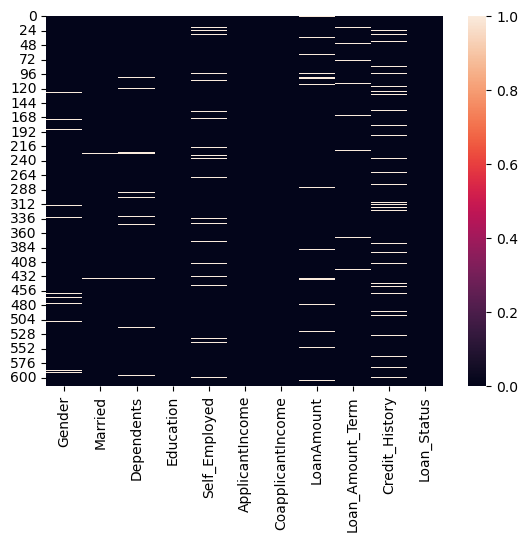

In [7]:
sns.heatmap(loanData.isnull())


# Dealing with Null Values¶

In [8]:
loanData.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Loan_Status
count,601,611,599,614,582,614
unique,2,2,4,2,2,2
top,Male,Yes,0,Graduate,No,Y
freq,489,398,345,480,500,422


In [9]:
# filling with mean for numerical columns 
loanData['LoanAmount'].fillna(loanData['LoanAmount'].mean(), inplace=True)
# # the number of days is not a continuous value, so we will fill it with mode
# loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].mode(), inplace=True)
# loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].mode(), inplace=True)
# loanData.isnull().sum()

In [10]:
loanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [11]:
#filling most frequent values for categorical columns since it's small number of missing values 

import pandas as pd
from sklearn.impute import SimpleImputer
# Identifying the columns with missing values
cols_with_missing_values = [col for col in loanData.columns if loanData[col].isnull().any()]

# Creating the imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Applying the imputer to the columns with missing values
loanData[cols_with_missing_values] = imputer.fit_transform(loanData[cols_with_missing_values])

# Displaying the DataFrame to verify that missing values have been filled
loanData


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Y


In [12]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 52.9+ KB


In [13]:
loanData['Total_Income']=loanData['ApplicantIncome']+loanData['CoapplicantIncome']
loanData.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)
loanData

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Y,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Y,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Y,7583.0


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_cols = ['Gender', 'Married', 'Dependents','Education','Self_Employed','Loan_Status','Credit_History']  # Replace with your actual column names

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    loanData[col] = label_encoder.fit_transform(loanData[col])

# Display the first few rows of the DataFrame to see the changes
loanData.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1,1,6000.0


In [15]:
loanData['LoanAmount'] = loanData['LoanAmount'].round(2)
loanData

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,1,0,0,0,0,146.41,360.0,1,1,5849.0
1,1,1,1,0,0,128.00,360.0,1,0,6091.0
2,1,1,0,0,1,66.00,360.0,1,1,3000.0
3,1,1,0,1,0,120.00,360.0,1,1,4941.0
4,1,0,0,0,0,141.00,360.0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.00,360.0,1,1,2900.0
610,1,1,3,0,0,40.00,180.0,1,1,4106.0
611,1,1,1,0,0,253.00,360.0,1,1,8312.0
612,1,1,2,0,0,187.00,360.0,1,1,7583.0


In [16]:
loanData.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Loan_Status         0
Total_Income        0
dtype: int64

In [17]:
loanData.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

# handel outliers

In [18]:
loanData.describe()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Loan_Status,Total_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,146.412085,0.855049,0.687296,7024.705081
std,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,0.352339,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,1.000000,0.000000,4166.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,1.000000,1.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,1.000000,1.000000,7521.750000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,1.000000,1.000000,81000.000000


In [20]:
loanData

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,1,0,0,0,0,146.41,360.0,1,1,5849.0
1,1,1,1,0,0,128.00,360.0,1,0,6091.0
2,1,1,0,0,1,66.00,360.0,1,1,3000.0
3,1,1,0,1,0,120.00,360.0,1,1,4941.0
4,1,0,0,0,0,141.00,360.0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.00,360.0,1,1,2900.0
610,1,1,3,0,0,40.00,180.0,1,1,4106.0
611,1,1,1,0,0,253.00,360.0,1,1,8312.0
612,1,1,2,0,0,187.00,360.0,1,1,7583.0


In [19]:
loanData.LoanAmount[0]/loanData.Loan_Amount_Term[0]

0.4066944444444444

In [26]:
# if the loan amount is more than 30% of the total income, then it's an outlier
# in this case, the loan amount is more than 30% of the total income and the loan status is approved
# so we will remove this row from the dataset
# non outlier rows will be added to the list
outlier_list = []

for index, row in loanData.iterrows():
    if row['LoanAmount'] / row['Loan_Amount_Term'] >= 0.3 * row['Total_Income'] and row['Loan_Status'] == 1:
        outlier_list.append(True)

print(outlier_list)


[]


# creat Modle

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the DataFrame into input and target arrays
y = loanData['Loan_Status']
X = loanData.drop(['Loan_Status'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [49]:
modle = LogisticRegression()
modle.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
modle.score(X_test, y_test)

0.8432432432432433

In [51]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [52]:
svm_model.score(X_test, y_test)

0.6864864864864865

In [54]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(modle, file)

In [59]:
def predict_loanState(ginder, married, dependents, education, self_employed, loan_amount, loan_amount_term, credit_history, total_income):
    # Load the model from the file
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    # Make a prediction using the model
    prediction = model.predict([[ginder, married, dependents, education, self_employed, loan_amount, loan_amount_term, credit_history, total_income]])
    # Return the prediction
    if prediction[0] == 0:
        return 'Loan Rejected'
    elif prediction[0] == 1:
        return 'Loan Approved'

In [60]:
predict_loanState(1, 1, 1, 1, 1, 100, 100, 1, 1000)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Loan Approved'